                                                                                                            Arunjith PM

# PROJECT

# Business Case: Netflix - Data Exploration and Visualisation

## Business Problem

Analyze the data and generate insights that could help Netflix team deciding which type 
of shows/movies to produce and how they can grow the business in different countries

# PROBLEM STATEMENT

1-Who are the top most 10 directers in movies
2.How Type of shows differ in Netflix
3.Top 10 Countries with highest numbers of Shows
4.How has the number of movies released per year changed over the last 20-30 years?
5.Which directors directed most number of TV-shows
6.Top most 10 TV-Show directors
7.directors directed most number of Shows
8.directors in each country
9.what kind geners available netflix
10.Movies duration
11.How genres varies in netflix for diffrent years
12.Any relation b/w relese month of relese vs genres
13.which month relese most movies
14.which month relese most movies in india?
15.which week relese most movies
16.Shows for kids ,teens , Adults
17.Relation b/w TV-Shows and No.of seasons in Netflix
18.most productive director
19.Acters in most number of shows 
20.Countrys of acters of most number of shows
21.most genres in top 5 shows production countrys in last 3 decades
22.Any correlation between movie duration and No.of movies in last 3 decade
23.Howmany war and romantic movies in our dataset

# DATA RISK/COST

1.Date in our data is in Object format
2.Columns 'cast','listed_in','country','director' are nested columns ,so we need to split
3.Majority TV Show does not have director name (2446 out of 2676 are null values)
4.Some movies does not have director name (188 out of 6131 are null values)
5.data does't contain movies revanue and budget
6.Rating column in our data is unfamiliar pattern
7.Dataset doesnot contain imdb rating
8.Movies and TV-Shows doesnot contain main acters

# Data Information

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv('netflix.csv')

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### It has 12 columns
   - Unique Showid for each shows
   - Whether show is Movie or TV-shows
   - Title of the shows
   - Director of the show
   - Which country produced the show
   - Cast of each show
   - Show released date on Netflix
   - Released year of the show
   - Rating of the movie, whether watches only for adults or for kids
   - Duration of the movie and season of the TV-show
   - Genres of the show
   - Discription of the show
   

In [13]:
df.shape

(8807, 12)

- 8807 rows and 12 columns

In [14]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

- date_added column in our data is the form of object. so, we need to convert to 'datetime' format

## Null data in our netflix data

Text(0.5, 1.0, 'Empty Data')

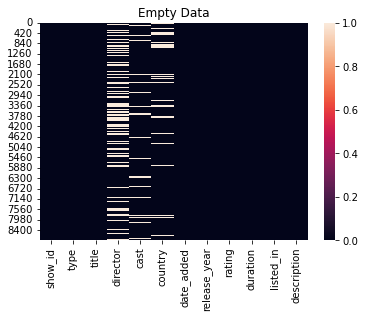

In [116]:
sns.heatmap(df.isnull())
plt.title("Empty Data")

In [7]:
df['date_added']=pd.to_datetime(df['date_added'])  # convert datatype of date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


#### Rating column in data is American rating code format. So, we need to change to accecable format

In [51]:
df['rating']=df['rating'].replace({'PG-13':'Teens(13+)','PG':'Older Kids(7+)','TV-MA':'Adults(18+)','TV-14':'Young Adults(16+)',
                           'TV-PG':'Older Kids(7+)Parental Guidance Suggested','TV-Y':'Kids(All)','TV-Y7':'Older Kids(7+)','R':'Adults only',
                           'NC-17':'No One 17 and Under Admitted', 'TV-G':'Kids(All)Suitable for all ages',
                           'TV-Y7-FV':'Older Kids(7+)programming with fantasy violence','NR':'Adults(18+) NotRated',
                           'G':'Kids(All)','UR':'Unrated'})
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,Teens(13+),90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults(18+),2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,Adults(18+),1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,Adults(18+),1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults(18+),2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Null values in data

In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

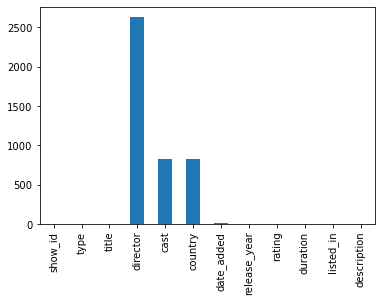

In [8]:
df.isnull().sum().plot.bar()

#### director,cast,country,date_added,date added,rating,duration columns has null values

### movies

In [9]:
m=df[df['type']=='Movie']
m=m.sort_values("date_added",ascending=False)                         #sort by date added
m=m.sort_values("release_year",ascending=False).reset_index().drop('index',axis=1)
m

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1111,Movie,Madame Claude,Sylvie Verheyde,"Karole Rocher, Garance Marillier, Roschdy Zem,...",France,2021-04-02,2021,TV-MA,113 min,"Dramas, International Movies","In 1960s Paris, Madame Claude's influence exte..."
1,s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,2021-01-01,2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...
2,s340,Movie,I missed you: Director's Cut,"Mag Hsu, Hsu Chih-yen","Wu Kang-ren, Eve Ai, Fu Meng-po, Lin Mei-hsiu,...",NaN,2021-08-01,2021,TV-14,96 min,"Dramas, Independent Movies, International Movies",A workaholic reconnects with two men she block...
3,s872,Movie,Sardar Ka Grandson,Kaashvie Nair,"Arjun Kapoor, Neena Gupta, Rakul Preet Singh, ...",India,2021-05-18,2021,TV-14,140 min,"Comedies, Dramas, International Movies",A devoted grandson’s mission to reunite his ai...
4,s871,Movie,Amy Tan: Unintended Memoir,James Redford,Amy Tan,United States,2021-05-18,2021,TV-14,101 min,Documentaries,From her painful past to her successful career...
...,...,...,...,...,...,...,...,...,...,...,...,...
6126,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,2017-03-31,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
6127,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
6128,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
6129,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


In [12]:
m.describe(include=object)

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,6131,6131,6131,5943,5656,5691,6129,6128,6131,6131
unique,6131,1,6131,4354,5445,651,17,205,278,6105
top,s1111,Movie,Madame Claude,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,TV-MA,90 min,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,13,2058,2062,152,362,4


#### Totel 6131 movies in netflix

In [19]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   director      5943 non-null   object        
 4   cast          5656 non-null   object        
 5   country       5691 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   int64         
 8   rating        6129 non-null   object        
 9   duration      6128 non-null   object        
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 574.9+ KB


## tv show

In [84]:
t=df[df['type']=='TV Show']
t=t.sort_values("date_added",ascending=False)                         #sort by date added
t=t.sort_values("release_year",ascending=False).reset_index().drop('index',axis=1)
t

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s548,TV Show,We the People,NaN,"H.E.R., Adam Lambert, Cordae, Kristen Anderson...",United States,"July 4, 2021",2021,Older Kids(7+),1 Season,Kids' TV,Learn the basics of rights and citizenship wit...
1,s843,TV Show,High on the Hog: How African American Cuisine ...,NaN,NaN,NaN,"May 26, 2021",2021,Young Adults(16+),1 Season,Docuseries,Black food is American food. Chef and writer S...
2,s1169,TV Show,DOTA: Dragon's Blood,NaN,"Yuri Lowenthal, Lara Pulver, Kari Wahlgren, Al...",United States,"March 25, 2021",2021,Adults(18+),1 Season,Anime Series,A conflicted yet courageous Dragon Knight must...
3,s1167,TV Show,The Irregulars,NaN,"Mckell David, Thaddea Graham, Jojo Macari, Har...",United Kingdom,"March 26, 2021",2021,Young Adults(16+),1 Season,"British TV Shows, Crime TV Shows, Internationa...",A crew of misfits investigates a series of sup...
4,s1164,TV Show,Magic for Humans Spain,NaN,Antonio Díaz,Spain,"March 26, 2021",2021,Adults(18+),1 Season,"International TV Shows, Reality TV, Spanish-La...","In this Spanish adaptation of ""Magic for Human..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2671,s8190,TV Show,The Andy Griffith Show,NaN,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,Kids(All)Suitable for all ages,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...
2672,s8542,TV Show,The Twilight Zone (Original Series),NaN,Rod Serling,United States,"July 1, 2017",1963,Young Adults(16+),4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
2673,s7744,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",NaN,United States,"February 1, 2017",1946,Young Adults(16+),1 Season,TV Shows,This newly preserved collection features more ...
2674,s1332,TV Show,Five Came Back: The Reference Films,NaN,NaN,United States,"February 9, 2021",1945,Adults(18+),1 Season,TV Shows,This collection includes 12 World War II-era p...


In [13]:
t.describe(include=object)

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,2676,2676,2676,230,2326,2285,2674,2676,2676,2676
unique,2676,1,2676,222,2283,196,9,15,236,2672
top,s2,TV Show,Blood & Water,Alastair Fothergill,David Attenborough,United States,TV-MA,1 Season,Kids' TV,"Two quirky cats, Ollie and Moon, and their fri..."
freq,1,2676,1,3,14,760,1145,1793,220,2


In [21]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2676 non-null   object        
 1   type          2676 non-null   object        
 2   title         2676 non-null   object        
 3   director      230 non-null    object        
 4   cast          2326 non-null   object        
 5   country       2285 non-null   object        
 6   date_added    2666 non-null   datetime64[ns]
 7   release_year  2676 non-null   int64         
 8   rating        2674 non-null   object        
 9   duration      2676 non-null   object        
 10  listed_in     2676 non-null   object        
 11  description   2676 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 251.0+ KB


#### Totel 2676 TV-Shows

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


#### Unique relesed year 

In [23]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [14]:
df['release_year'].nunique()

74

#### Totel of 74 unique years, from 1925 to 2021

#### Unique titles

In [24]:
df['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [15]:
df['title'].nunique()

8807

In [17]:
df['title'].duplicated().sum()

0

#### Totel 8807 Title.It didnot have any duplicate values

In [25]:
df.describe(include=object)

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,15,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,Adults(18+),1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


In [26]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### first movie relesed on 1925
#### movies till 2021
#### 25% No.of totel shows from 1925 to 2013
#### Remaining 75% shows are between 2013 to 2021

### how many countrys relese movies and tv shows in netflix 

In [29]:
dc=df.assign(country=df['country'].str.split(',')).explode('country').reset_index()
dc['country']=dc['country'].dropna()
dc['country']=dc['country'].str.lstrip()
dc.replace([''],np.nan,inplace=True)
x=dc['country'].dropna()
x=x.sort_values()
dc.sort_values(by='country',inplace=True)

In [30]:
x.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt',
       'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicara

In [31]:
dc['country'].nunique()

122

In [32]:
dc.nunique()

index           8807
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          122
date_added      1714
release_year      74
rating            15
duration         220
listed_in        514
description     8775
dtype: int64

#### totel of 122 diffrent countrys relese movies and tv shows in netflix

### how many acters in netflix TV-shows and movies?

In [33]:
dcast=df.assign(cast=df['cast'].str.split(',')).explode('cast')
dcast['cast']=dcast['cast'].str.lstrip()
dcast['cast'].nunique()

36439

In [34]:
dcast['cast'].unique()

array([nan, 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

#### Totel 36439 acters in Netflix

### how many genres are in netflix?

In [35]:
dl=df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
dl['listed_in']=dl['listed_in'].str.lstrip()
dl['listed_in'].nunique()

42

In [36]:
dl['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

#### Totel 42 genres in Netflix

### how many unique ratings are in netflix?

In [37]:
dr=df.assign(rating=df['rating'].str.split(',')).explode('rating')
dr['rating']=dr['rating'].str.lstrip()
dr['rating'].nunique()

15

In [38]:
dr['rating'].unique()

array(['Teens(13+)', 'Adults(18+)', 'Older Kids(7+)', 'Young Adults(16+)',
       'Older Kids(7+)Parental Guidance Suggested', 'Kids(All)',
       'Adults only', 'Kids(All)Suitable for all ages',
       'No One 17 and Under Admitted', '74 min', '84 min', '66 min',
       'Adults(18+) NotRated', nan,
       'Older Kids(7+)programming with fantasy violence', 'Unrated'],
      dtype=object)

#### it contains 4 false data:
 -  1-'74 min'
 -  2-'84 min'
 -  3-'66 min'
 -  4-nan
#### Totel of 11 diffrent genres

### how many directors relese shows on netflix?

In [41]:
dd=df.assign(director=df['director'].str.split(',')).explode('director')
dd['director']=dd['director'].str.lstrip()
dd['director'].nunique()

4993

In [42]:
dd['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

#### Totel 4993 unique directors

## directors directed most number of movies

In [58]:
dm=m.assign(director=m['director'].str.split(',')).explode('director')
dm['director']=dm['director'].str.lstrip()
dm['director'].dropna(inplace=True)
dm


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1111,Movie,Madame Claude,Sylvie Verheyde,"Karole Rocher, Garance Marillier, Roschdy Zem,...",France,2021-04-02,2021,Adults(18+),113 min,"Dramas, International Movies","In 1960s Paris, Madame Claude's influence exte..."
1,s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,2021-01-01,2021,Young Adults(16+),54 min,Documentaries,They've built a movement out of minimalism. Lo...
2,s340,Movie,I missed you: Director's Cut,Mag Hsu,"Wu Kang-ren, Eve Ai, Fu Meng-po, Lin Mei-hsiu,...",NaN,2021-08-01,2021,Young Adults(16+),96 min,"Dramas, Independent Movies, International Movies",A workaholic reconnects with two men she block...
2,s340,Movie,I missed you: Director's Cut,Hsu Chih-yen,"Wu Kang-ren, Eve Ai, Fu Meng-po, Lin Mei-hsiu,...",NaN,2021-08-01,2021,Young Adults(16+),96 min,"Dramas, Independent Movies, International Movies",A workaholic reconnects with two men she block...
3,s872,Movie,Sardar Ka Grandson,Kaashvie Nair,"Arjun Kapoor, Neena Gupta, Rakul Preet Singh, ...",India,2021-05-18,2021,Young Adults(16+),140 min,"Comedies, Dramas, International Movies",A devoted grandson’s mission to reunite his ai...
...,...,...,...,...,...,...,...,...,...,...,...,...
6126,s8740,Movie,Why We Fight: The Battle of Russia,Anatole Litvak,NaN,United States,2017-03-31,1943,Older Kids(7+)Parental Guidance Suggested,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
6127,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,Older Kids(7+)Parental Guidance Suggested,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
6128,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,2017-03-31,1943,Older Kids(7+)Parental Guidance Suggested,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
6129,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,2017-03-31,1942,Young Adults(16+),52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


In [59]:
dm['director'].value_counts()

Rajiv Chilaka           22
Jan Suter               21
Raúl Campos             19
Suhas Kadav             16
Marcus Raboy            15
                        ..
Jean-Claude La Marre     1
Trent Haaga              1
Shadi Ali                1
Morgan Matthews          1
Dallas Jenkins           1
Name: director, Length: 4777, dtype: int64

### top most 10 directers in movies

<AxesSubplot:xlabel='director', ylabel='count'>

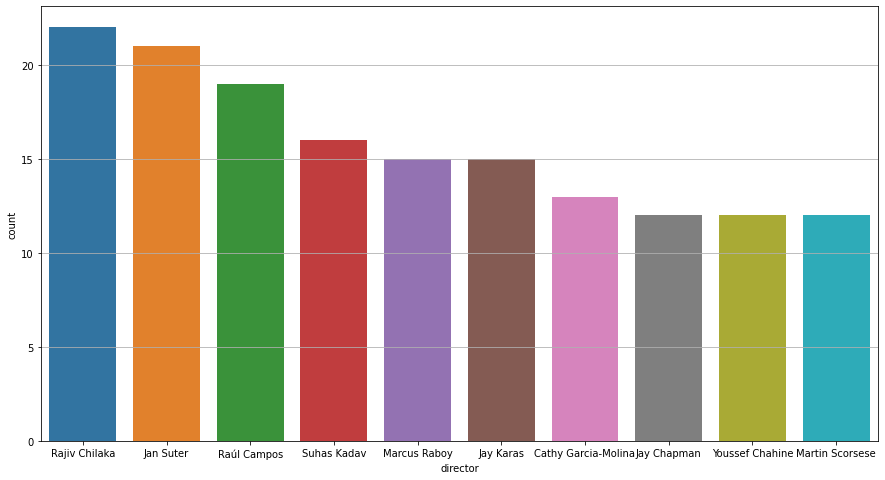

In [60]:
plt.figure(figsize=(15,8))
plt.grid()
sns.countplot(data=dm,x='director',order=dm['director'].value_counts().index[0:10])

#### Rajiv Chilaka is the most No.of movies directed on netflix


## Type of shows in Netflix

<AxesSubplot:xlabel='type', ylabel='count'>

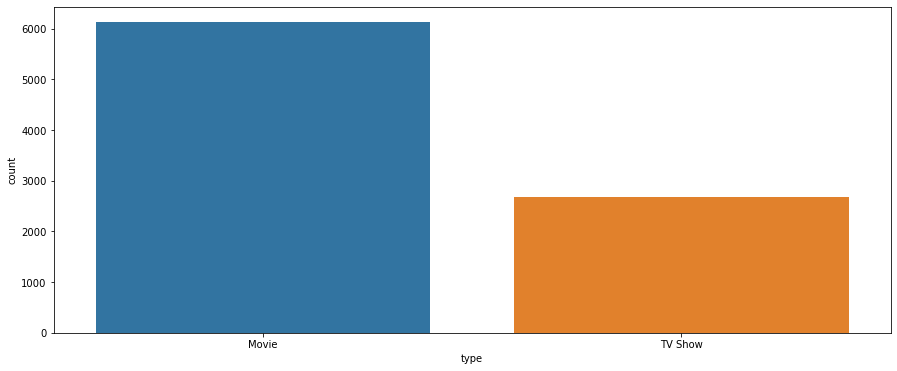

In [118]:
plt.figure(figsize=(15,6))
sns.countplot(data = df ,x ='type')

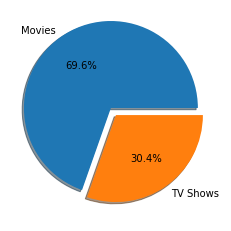

In [120]:
label = 'Movies','TV Shows'
sizes = df.type.value_counts()
plt.pie(sizes,explode = (0.1,0), labels =label,shadow = True,autopct ='%1.1f%%')
plt.show()

#### Almost 70% of the Shows in Netflix are Movies

## Top 10 Countries with highest numbers of Shows

Text(0.5, 1.0, 'Top 10 country which has most no. of titles')

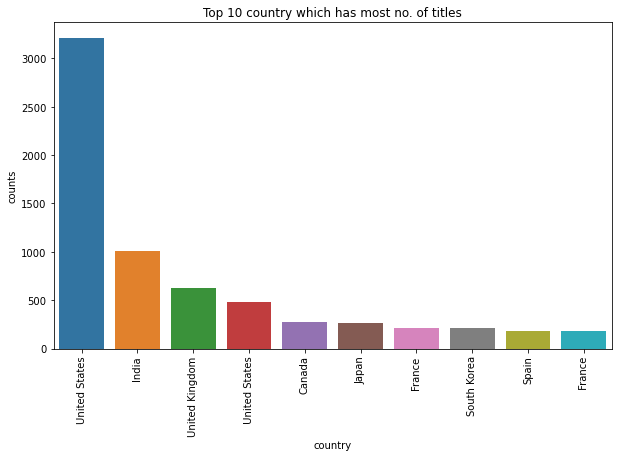

In [124]:
plt.figure(figsize=(10,6))
dq=df.assign(country=df['country'].str.split(',')).explode('country')   #split coma seperated column country
dq.dropna(subset=['country'],inplace=True)
dq=dq.reset_index()
top_countries = dq['country'].value_counts().rename_axis('country').reset_index(name = 'counts')[:10]
sns.barplot(data = top_countries, y= 'counts',x = 'country')
plt.xticks(rotation=90)
plt.title('Top 10 country which has most no. of titles')

#### United states are the most movie releasing country in Netflix

###  How has the number of movies released per year changed over the last 20-30 years?

<AxesSubplot:xlabel='release_year'>

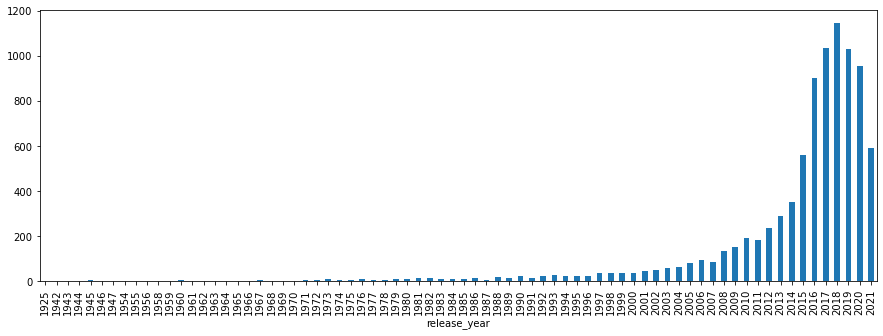

In [130]:
plt.figure(figsize=(15,5))
df.groupby('release_year')['title'].count().plot.bar()

#### Movie relesed per year in last 3 decades shows sudden growth

## directors directed most number of TV-shows

In [132]:
dt=t.assign(director=t['director'].str.split(',')).explode('director')
dt['director']=dt['director'].str.lstrip()
dt['director'].dropna(inplace=True)
dt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s548,TV Show,We the People,NaN,"H.E.R., Adam Lambert, Cordae, Kristen Anderson...",United States,"July 4, 2021",2021,Older Kids(7+),1 Season,Kids' TV,Learn the basics of rights and citizenship wit...
1,s843,TV Show,High on the Hog: How African American Cuisine ...,NaN,NaN,NaN,"May 26, 2021",2021,Young Adults(16+),1 Season,Docuseries,Black food is American food. Chef and writer S...
2,s1169,TV Show,DOTA: Dragon's Blood,NaN,"Yuri Lowenthal, Lara Pulver, Kari Wahlgren, Al...",United States,"March 25, 2021",2021,Adults(18+),1 Season,Anime Series,A conflicted yet courageous Dragon Knight must...
3,s1167,TV Show,The Irregulars,NaN,"Mckell David, Thaddea Graham, Jojo Macari, Har...",United Kingdom,"March 26, 2021",2021,Young Adults(16+),1 Season,"British TV Shows, Crime TV Shows, Internationa...",A crew of misfits investigates a series of sup...
4,s1164,TV Show,Magic for Humans Spain,NaN,Antonio Díaz,Spain,"March 26, 2021",2021,Adults(18+),1 Season,"International TV Shows, Reality TV, Spanish-La...","In this Spanish adaptation of ""Magic for Human..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2673,s7744,TV Show,Pioneers of African-American Cinema,Spencer Williams,NaN,United States,"February 1, 2017",1946,Young Adults(16+),1 Season,TV Shows,This newly preserved collection features more ...
2673,s7744,TV Show,Pioneers of African-American Cinema,Richard E. Norman,NaN,United States,"February 1, 2017",1946,Young Adults(16+),1 Season,TV Shows,This newly preserved collection features more ...
2673,s7744,TV Show,Pioneers of African-American Cinema,Richard Maurice,NaN,United States,"February 1, 2017",1946,Young Adults(16+),1 Season,TV Shows,This newly preserved collection features more ...
2674,s1332,TV Show,Five Came Back: The Reference Films,NaN,NaN,United States,"February 9, 2021",1945,Adults(18+),1 Season,TV Shows,This collection includes 12 World War II-era p...


In [62]:
dt['director'].value_counts()

Alastair Fothergill      3
Ken Burns                3
Stan Lathan              2
Lynn Novick              2
Gautham Vasudev Menon    2
                        ..
Pass Patthanakumjon      1
Ousmane Ly               1
Adrien Lagier            1
Kenny Ortega             1
Richard Maurice          1
Name: director, Length: 299, dtype: int64

### Top most 10 TV-Show directors

<AxesSubplot:xlabel='director', ylabel='count'>

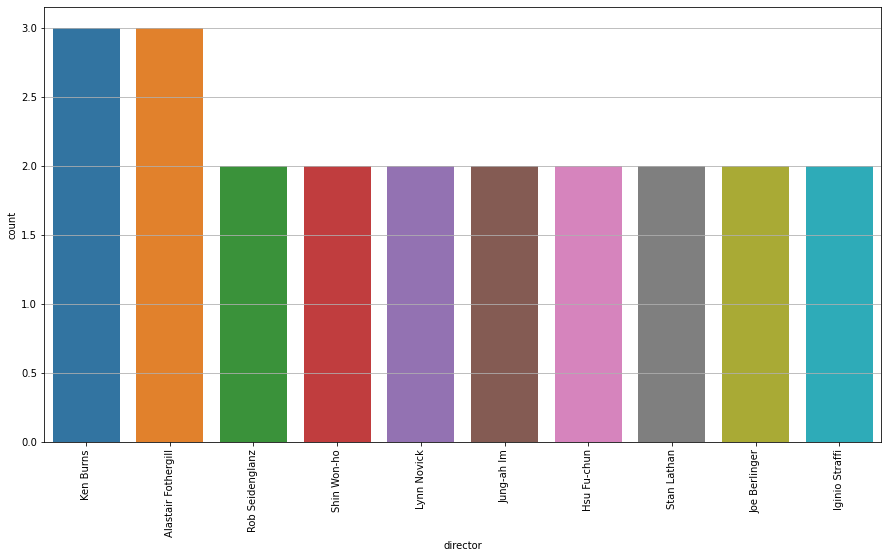

In [133]:
plt.figure(figsize=(15,8))
plt.grid()
plt.xticks(rotation=90)
sns.countplot(data=dt,x='director',order=dt['director'].value_counts().index[0:10])


#### Ken Burns and Alastair Fothergill is the most number of TV-Show directed in Netflix

## directors directed most number of Shows

In [20]:
ds=df.assign(director=df['director'].str.split(',')).explode('director')
ds['director']=ds['director'].str.lstrip()
ds['director'].dropna(inplace=True)
ds

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [21]:
ds['director'].value_counts()

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4993, dtype: int64

<AxesSubplot:xlabel='director', ylabel='count'>

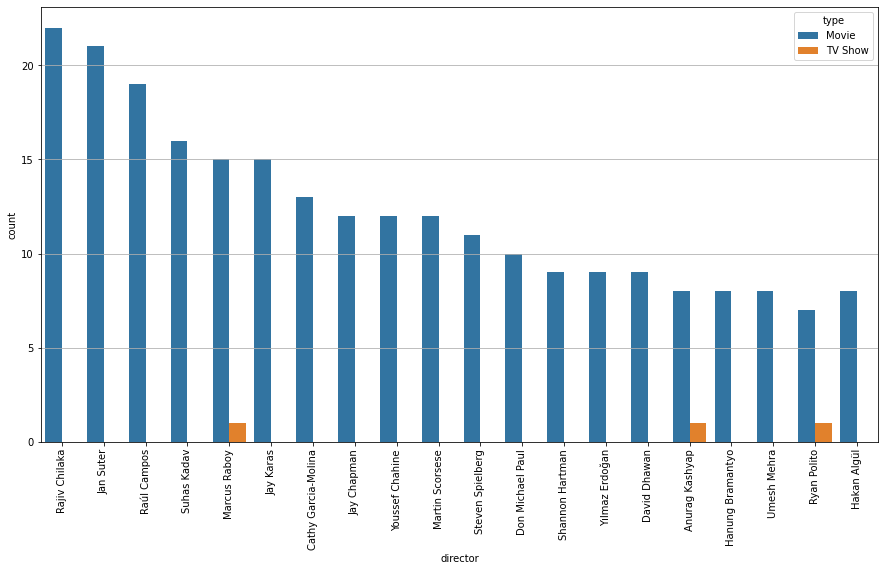

In [22]:
plt.figure(figsize=(15,8))
plt.grid()
plt.xticks(rotation=90)
sns.countplot(data=ds,x='director',order=ds['director'].value_counts().index[0:20],hue='type')

#### most directors didnot do both tv shows and movies
#### few directers like 'Marcus Raboy','Anurag Kashyap','Ryan Polito' are producing both movie and TV-Shows

## directors in each country

In [23]:
ds=df.assign(director=df['director'].str.split(',')).explode('director')
ds=ds.assign(country=ds['country'].str.split(',')).explode('country')
ds['director']=ds['director'].str.lstrip()
ds['country']=ds['country'].str.lstrip()
ds=ds.groupby('country')['director'].count().to_frame()
ds=ds.sort_values('director',ascending=False).head(15).reset_index()
ds

,country,director
0,United States,3149
1,India,1045
2,United Kingdom,591
3,Canada,371
4,France,364
5,Spain,205
6,Germany,198
7,Japan,170
8,Mexico,133
9,China,128


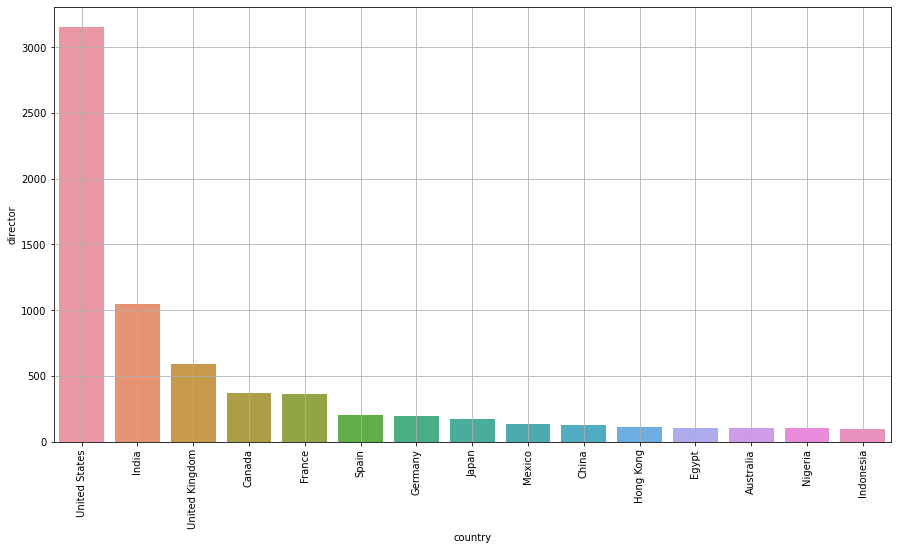

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(data=ds,x='country',y='director')
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### United states has most of the directors
#### second most is India

## what kind geners on netflix

In [24]:
dl=df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
dl['listed_in']=dl['listed_in'].str.lstrip()
dl=dl.groupby('listed_in')['title'].count().to_frame()
dl=dl.sort_values('title',ascending=False).head(15).reset_index()
dl

,listed_in,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


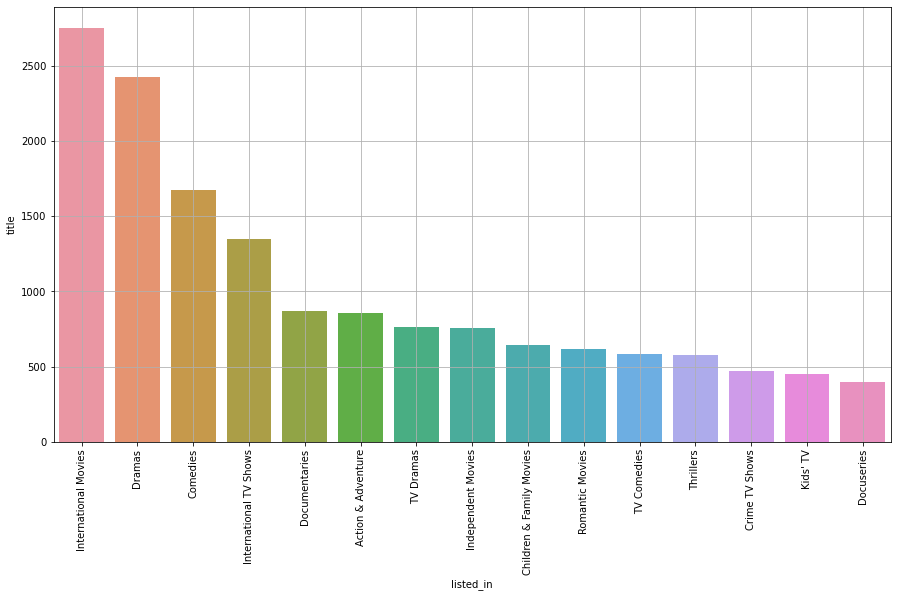

In [71]:
plt.figure(figsize=(15,8))
sns.barplot(data=dl,x='listed_in',y='title')
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### > International Movies are most in Netflix
#### > Dramas and comedies are second and third most genres in Netflix
#### > Kids shows are much less compire to other shows

# Movies duration

In [25]:
dl=m.groupby('duration')['title'].count().to_frame()
dl=dl.sort_values('title',ascending=False).reset_index()
dl

,duration,title
0,90 min,152
1,93 min,146
2,94 min,146
3,97 min,146
4,91 min,144
...,...,...
200,253 min,1
201,273 min,1
202,3 min,1
203,312 min,1


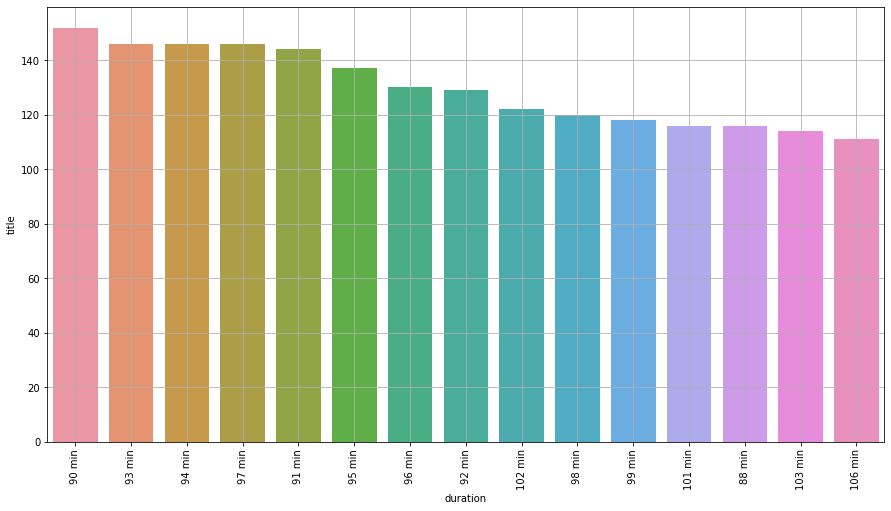

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(data=dl.head(15),x='duration',y='title')
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### Converting movie duration to integer

In [28]:
dl['duration'] = dl['duration'].map(lambda x: str(x)[:-3])
dl['duration'] = dl['duration'].astype(int)
dl

,duration,title
0,90,152
1,93,146
2,94,146
3,97,146
4,91,144
...,...,...
200,253,1
201,273,1
202,3,1
203,312,1


In [29]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   duration  205 non-null    int32
 1   title     205 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 2.5 KB


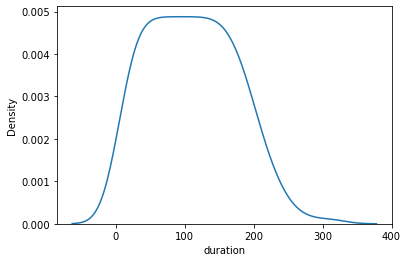

In [249]:
sns.kdeplot(dl['duration'])
plt.show()

#### Netflix contain most of the movies in the duration of 50 min to 150 min range

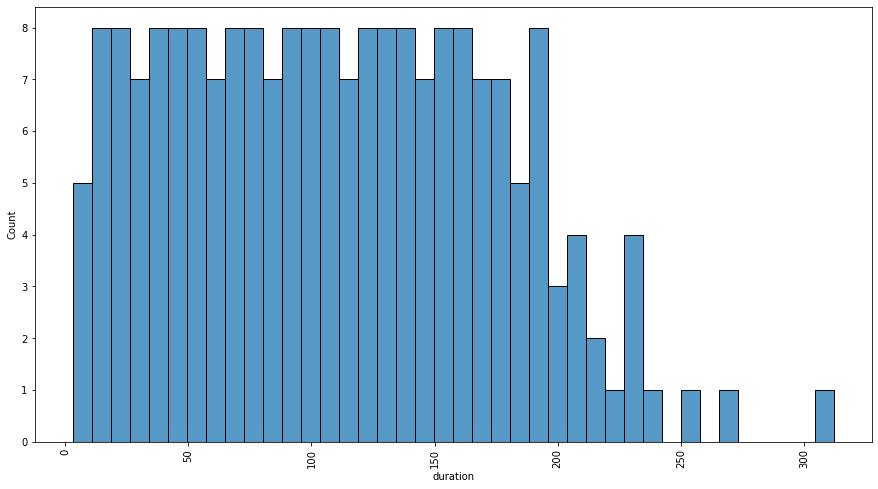

In [260]:
plt.figure(figsize=(15,8))
sns.histplot(dl['duration'], bins= 40)
plt.xticks(rotation=90)
plt.show()

#### > this histogram shows No.of movies in set of durations 

## How genres varies in netflix for diffrent years

In [32]:
dm=df.assign(rating=df['rating'].str.split(',')).explode('rating')
ds=dm.groupby(['rating','release_year'])['title'].count().to_frame().reset_index()
ds=ds[3:]
ds

,rating,release_year,title
3,Adults only,1962,1
4,Adults only,1967,2
5,Adults only,1968,1
6,Adults only,1971,1
7,Adults only,1972,1
...,...,...,...
398,Young Adults(16+),2017,251
399,Young Adults(16+),2018,268
400,Young Adults(16+),2019,252
401,Young Adults(16+),2020,174


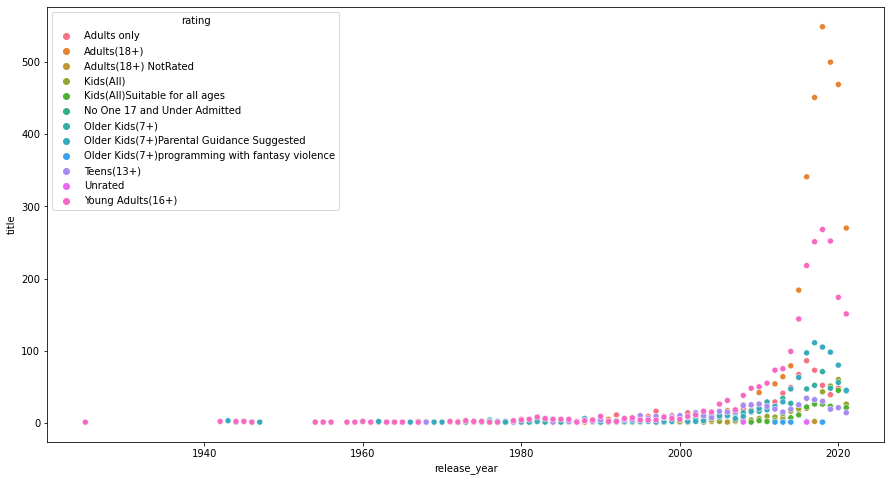

In [33]:
plt.figure(figsize=(15,8))
sns.scatterplot(x ='release_year', y ='title' , data= ds, hue='rating')
plt.show()

#### > For 19th century there is only 2 type of rating are in netflix
#### > In last 3 decades shows produced based on diffrent type of rating, It can help us to watch diffrent verity of shows
#### > In recent years adults shows are the most relesed
#### > Kids movies and shows are low compare to adults shows

## Any relation b/w relese month of relese vs genres

In [35]:
df['date_added']=pd.to_datetime(df['date_added'])
dq=df
dq['date_added'] = pd.DatetimeIndex(dq['date_added']).month
dq['date_added']

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
8802    11.0
8803     7.0
8804    11.0
8805     1.0
8806     3.0
Name: date_added, Length: 8807, dtype: float64

In [36]:
dq=dq.assign(listed_in=dq['listed_in'].str.split(',')).explode('listed_in')
dq['listed_in']=dq['listed_in'].str.lstrip()
dq=dq.groupby(['date_added','listed_in'])['title'].count().to_frame().reset_index()
dq


,date_added,listed_in,title
0,1.0,Action & Adventure,79
1,1.0,Anime Features,4
2,1.0,Anime Series,11
3,1.0,British TV Shows,13
4,1.0,Children & Family Movies,63
...,...,...,...
494,12.0,TV Sci-Fi & Fantasy,6
495,12.0,TV Shows,2
496,12.0,TV Thrillers,8
497,12.0,Teen TV Shows,8


In [37]:
dz=dq.sort_values(['date_added','title'],ascending=False).groupby('date_added').head(599)
dz['listed_in'].unique()

array(['International Movies', 'Dramas', 'Comedies',
       'International TV Shows', 'TV Dramas', 'Documentaries',
       'Action & Adventure', 'TV Comedies', 'Independent Movies',
       'Children & Family Movies', 'Romantic Movies', 'Romantic TV Shows',
       'Thrillers', 'Crime TV Shows', 'Music & Musicals',
       'Stand-Up Comedy', "Kids' TV", 'Docuseries', 'Reality TV',
       'Horror Movies', 'British TV Shows', 'Korean TV Shows',
       'Anime Series', 'Sports Movies', 'Sci-Fi & Fantasy',
       'TV Action & Adventure', 'LGBTQ Movies',
       'Spanish-Language TV Shows', 'Classic Movies', 'TV Mysteries',
       'TV Thrillers', 'Teen TV Shows', 'Faith & Spirituality',
       'Stand-Up Comedy & Talk Shows', 'TV Horror', 'Cult Movies',
       'Movies', 'TV Sci-Fi & Fantasy', 'Classic & Cult TV',
       'Science & Nature TV', 'Anime Features', 'TV Shows'], dtype=object)

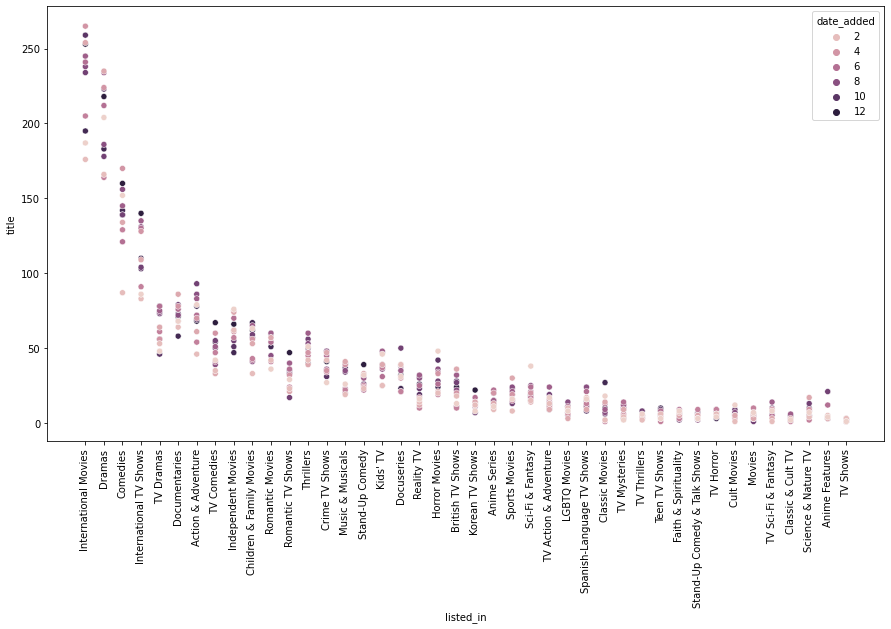

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(x ='listed_in', y ='title' , data= dz, hue='date_added')
plt.xticks(rotation=90)
plt.show()

 #### > International movies,Documentaries,Sci-Fi & Fantasy,Horrer movies  and Dramas mostly relesed on starting and middle of the      year
#### > International TV-Shows,Action adventure Romantic movies,classic movies and TV-Comedies are relesed on year endings
#### > TV-action and adventure, Thrillers, Comedies are mostly relesed on halferly

## which month relese most movies

In [217]:
df['date_added']=pd.to_datetime(df['date_added'])
dq=df
dq['month'] = pd.DatetimeIndex(dq['date_added']).month_name()
dq

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January


In [221]:
d=dq.groupby(['month'])['title'].count().to_frame().reset_index()
d.sort_values('title',inplace=True)
d

,month,title
3,February,563
8,May,632
9,November,705
6,June,728
4,January,738
7,March,742
1,August,755
10,October,760
0,April,764
11,September,770


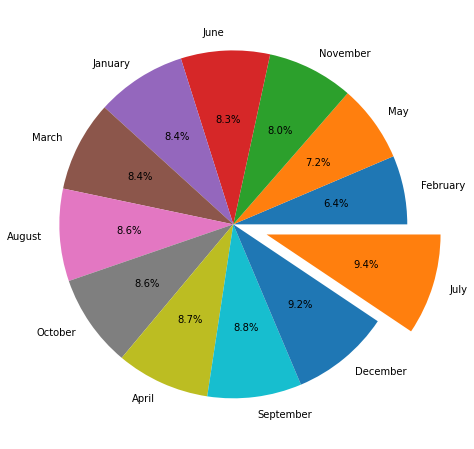

In [227]:
plt.figure(figsize=(15,8))
label=d.month.to_list()
data=d.title.to_list()
plt.pie(data,labels=label,autopct='%1.1f%%',explode=(0,0,0,0,0,0,0,0,0,0,0,0.2))
plt.show()

#### > For worldwide July is the most movie produced month
#### > movie relesed in almost all months are equal

# which month relese most movies in india?

In [231]:
di=df.assign(country=df['country'].str.split(',')).explode('country')
di['country']=di['country'].str.lstrip()
i=di[di['country']=='India']
i

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,September
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...",India,2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",September
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",September
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,January
8775,s8776,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,2018-08-31,2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal...",August
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,December
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,February


In [243]:
d=i.groupby(['month'])['title'].count().to_frame().reset_index()
d

,month,title
0,April,117
1,August,97
2,December,120
3,February,59
4,January,71
5,July,81
6,June,49
7,March,110
8,May,65
9,November,94


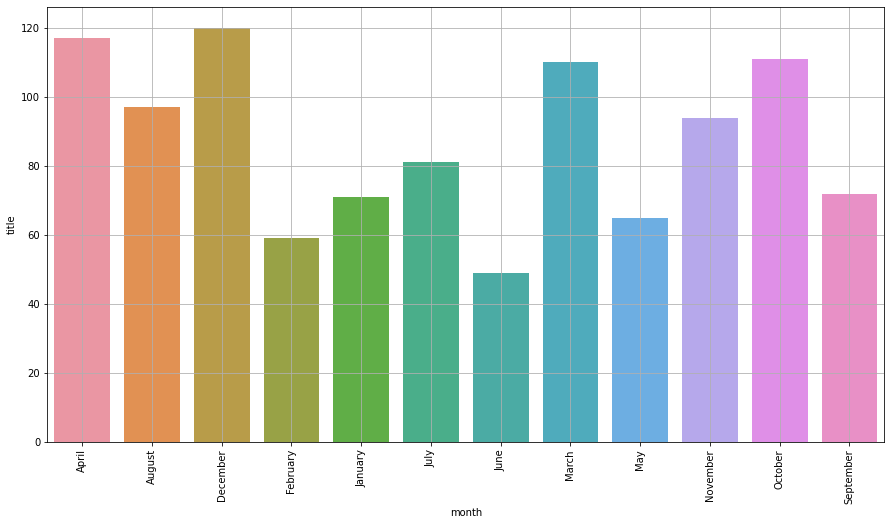

In [244]:
plt.figure(figsize=(15,8))
sns.barplot(data=d,x='month',y='title')
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### > december, is most festive season in india, so most movies relese on december
#### > March,April,October,November,December are the other most movie relesing months


## which week relese most movies

In [42]:
df['date_added']=pd.to_datetime(df['date_added'])
dq=df
dq['date_added'] = pd.DatetimeIndex(dq['date_added']).day
dq['date_added']=dq['date_added']//7
dq['date_added']=dq['date_added']+1

In [43]:
dq=dq.groupby('date_added')['title'].count().to_frame().reset_index()
dq

,date_added,title
0,1.0,3304
1,2.0,1261
2,3.0,2053
3,4.0,1364
4,5.0,815


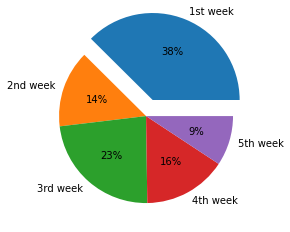

In [44]:
plt.pie(dq['title'],labels=['1st week','2nd week','3rd week','4th week','5th week'],explode=(0.2,0,0,0,0),autopct='%.0f%%')
plt.show()

#### > 38% of the movies relesed on first week of the month

## Shows for kids

In [52]:
kids=df[(df['rating']=='Kids(All)')|(df['rating']=='Older Kids(7+)programming with fantasy violence')|
        (df['rating']=='Older Kids(7+)')|(df['rating']=='Kids(All)Suitable for all ages')]
kids=kids.reset_index()
kids

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,Older Kids(7+),91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
1,23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,Kids(All),61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
2,34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,Older Kids(7+),1 Season,Kids' TV,Tayo speeds into an adventure when his friends...
3,37,s38,TV Show,Angry Birds,NaN,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,"September 16, 2021",2018,Older Kids(7+),1 Season,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h..."
4,39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,Older Kids(7+),3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,Older Kids(7+),88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
1191,8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,Older Kids(7+),2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
1192,8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,Older Kids(7+),3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
1193,8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,Older Kids(7+),2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [59]:
k=kids['title'].nunique()
k

1195

#### > Totel of 1195 shows for Kids

## shows for adults

In [54]:
adults=df[(df['rating']=='Adults(18+)')|(df['rating']=='Adults only')|(df['rating']=='No One 17 and Under Admitted')|
          (df['rating']=='Adults(18+) NotRated')]
adults=adults.reset_index()
adults

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults(18+),2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,Adults(18+),1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,Adults(18+),1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults(18+),2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,Adults(18+),1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,8792,s8793,Movie,Young Tiger,Mu Chu,"Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...",Hong Kong,"November 1, 2016",1973,Adults(18+) NotRated,81 min,"Action & Adventure, International Movies","Aided only by a tough female police officer, a..."
4085,8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,Adults(18+),131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
4086,8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,Adults(18+),96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
4087,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,Adults only,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


In [60]:
a=adults['title'].nunique()
a

4089

#### > totel 4089 shows for adults

## shows for teens

In [57]:
teen=df[(df['rating']=='Teens(13+)')|(df['rating']=='Young Adults(16+)')]
teen=teen.reset_index()
teen

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,Teens(13+),90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,Young Adults(16+),9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,Teens(13+),104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,Young Adults(16+),94 min,Thrillers,After a deadly home invasion at a couple’s new...
4,20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,NaN,NaN,"September 22, 2021",2021,Young Adults(16+),1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,8774,s8775,Movie,يوم الدين,Abu Bakr Shawky,"Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...","Egypt, Austria, United States","October 22, 2019",2018,Young Adults(16+),97 min,"Dramas, Independent Movies, International Movies",A man cured of leprosy and a young orphan leav...
2646,8782,s8783,Movie,Yoga Hosers,Kevin Smith,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,"December 2, 2016",2016,Teens(13+),88 min,"Comedies, Horror Movies, Independent Movies",With an all-important high school party at sta...
2647,8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,Young Adults(16+),98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
2648,8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,Young Adults(16+),120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [61]:
t=teen['title'].nunique()
t

2650

#### > totel 2650 Shows relesed for teens

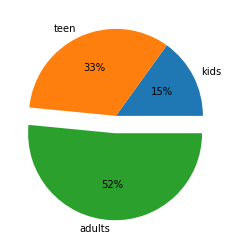

In [64]:
plt.pie([k,t,a],labels=['kids','teen','adults'],explode=(0,0,0.2),autopct='%0.f%%')
plt.show()

#### > Most of Netflix contain Adults shows

## Relation b/w TV-Shows and No.of seasons in Netflix

In [85]:
ts=t.groupby('duration')['title'].count().to_frame().reset_index()
ts.sort_values('title',ascending=False,inplace=True)
ts=ts.tail(14)
ts

,duration,title
7,2 Seasons,425
8,3 Seasons,199
9,4 Seasons,95
10,5 Seasons,65
11,6 Seasons,33
12,7 Seasons,23
13,8 Seasons,17
14,9 Seasons,9
1,10 Seasons,7
4,13 Seasons,3


In [86]:
ts['duration'] = ts['duration'].map(lambda x: str(x)[:-7])
ts['duration'] = ts['duration'].astype(int)
ts.rename(columns={'duration':'No_of_season'},inplace=True)
ts

,No_of_season,title
7,2,425
8,3,199
9,4,95
10,5,65
11,6,33
12,7,23
13,8,17
14,9,9
1,10,7
4,13,3


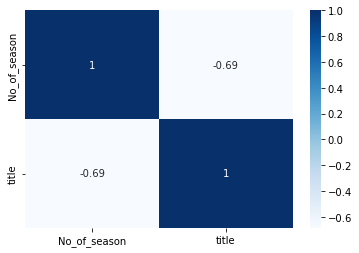

In [87]:
sns.heatmap(ts.corr(), cmap= "Blues", annot=True)
plt.show()

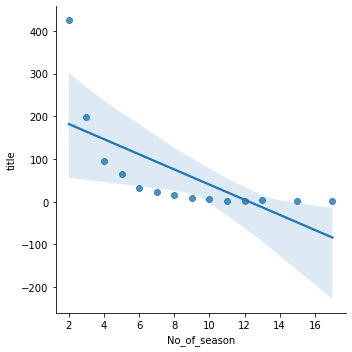

In [89]:
sns.lmplot(x = 'No_of_season', y= 'title', data = ts)
plt.show()

#### >  In correlation-Heatmap and lmplot we can see that number of TV-Shows decrese with season increses
#### > 17 is most number of seasons in TV-Shows

## most productive director

But does it make him the most productive director?
Chances are, he might be active for more years than other directors

Lets calculate the number of active years of each director

In [90]:
ds=df.assign(director=df['director'].str.split(',')).explode('director')
ds['director']=ds['director'].str.lstrip()
df_agg = ds.groupby(['director'])[["title", "release_year"]].aggregate({"release_year":['min','max'], "title": "count"})
df_agg  

release_year       title
                             min   max count
director                                    
A. L. Vijay                 2016  2019     2
A. Raajdheep                2020  2020     1
A. Salaam                   1975  1975     1
A.R. Murugadoss             2017  2018     2
Aadish Keluskar             2018  2018     1
...                          ...   ...   ...
Éric Warin                  2016  2016     1
Ísold Uggadóttir            2018  2018     1
Óskar Thór Axelsson         2017  2017     1
Ömer Faruk Sorak            2001  2011     3
Şenol Sönmez                2015  2019     2

[4993 rows x 3 columns]

In [91]:
df_agg.columns

MultiIndex([('release_year',   'min'),
            ('release_year',   'max'),
            (       'title', 'count')],
           )

In [92]:
df_agg['totel active years']=df_agg[('release_year',   'max')]-df_agg[('release_year',   'min')]
df_agg['movie per year']=df_agg[(       'title', 'count')]/df_agg['totel active years']

In [93]:
df_agg

release_year       title totel active years movie per year
                             min   max count                                  
director                                                                      
A. L. Vijay                 2016  2019     2                  3       0.666667
A. Raajdheep                2020  2020     1                  0            inf
A. Salaam                   1975  1975     1                  0            inf
A.R. Murugadoss             2017  2018     2                  1       2.000000
Aadish Keluskar             2018  2018     1                  0            inf
...                          ...   ...   ...                ...            ...
Éric Warin                  2016  2016     1                  0            inf
Ísold Uggadóttir            2018  2018     1                  0            inf
Óskar Thór Axelsson         2017  2017     1                  0            inf
Ömer Faruk Sorak            2001  2011     3                 10       0.300000
Şenol Sönmez                2015  2019     2                  4       0.500000

[4993 rows x 5 columns]

In [94]:
df_agg.columns = ['_'.join(col) for col in df_agg.columns]

In [95]:
df_agg=df_agg.reset_index()
df_agg=df_agg[df_agg['totel active years_']!=0]
df_agg.sort_values('movie per year_',ascending=False,inplace=True)

In [96]:
df_agg=df_agg.reset_index().drop('index',axis=1)
df_agg[df_agg['movie per year_']>1]

,director,release_year_min,release_year_max,title_count,totel active years_,movie per year_
0,Jan Suter,2016,2018,21,2,10.500000
1,Raúl Campos,2016,2018,19,2,9.500000
2,Justin G. Dyck,2017,2018,8,1,8.000000
3,Joey So,2019,2020,6,1,6.000000
4,Stanley Moore,2020,2021,5,1,5.000000
...,...,...,...,...,...,...
182,Thierry Donard,2014,2018,5,4,1.250000
183,Masahiko Murata,2009,2013,5,4,1.250000
184,Ishi Rudell,2014,2018,5,4,1.250000
185,Tilak Shetty,2012,2017,6,5,1.200000


#### - Jan suter is the most productive director. he directed average of 10.5 movie per year
#### -Only 186 directors are producing average of above 1 show per year

In [98]:
df_agg.sort_values('totel active years_',ascending=False)

,director,release_year_min,release_year_max,title_count,totel active years_,movie per year_
816,Martin Scorsese,1967,2019,12,52,0.230769
778,Youssef Chahine,1954,1999,12,45,0.266667
959,Brian De Palma,1976,2019,2,43,0.046512
774,Steven Spielberg,1975,2016,11,41,0.268293
871,Clint Eastwood,1976,2014,7,38,0.184211
...,...,...,...,...,...,...
101,Patricia Font,2018,2019,2,1,2.000000
102,Taika Waititi,2016,2017,2,1,2.000000
103,Johannes Roberts,2017,2018,2,1,2.000000
104,Kim Seong-hun,2020,2021,2,1,2.000000


#### > Martin scorsese is the most active director Netflix, he is in the field of 52 long years

## acters in most number of shows                                                                                      

In [151]:
da=df.assign(cast=df['cast'].str.split(',')).explode('cast')
da['cast']=da['cast'].str.lstrip()
da=da.groupby('cast')['title'].count().to_frame().reset_index()
da.sort_values('title',ascending=False,inplace=True)
da1=da.head(25)
da=da.head(15)
da

,cast,title
2832,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32
28974,Rupa Bhimani,31
25424,Om Puri,30
845,Akshay Kumar,30
35880,Yuki Kaji,29
25782,Paresh Rawal,28


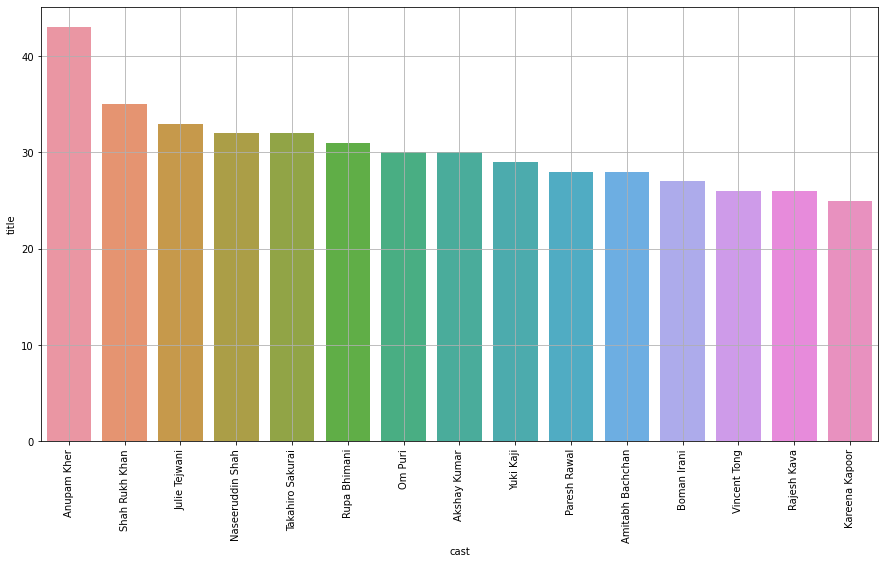

In [194]:
plt.figure(figsize=(15,8))
sns.barplot(data=da,x='cast',y='title')
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### > Anupam Kher is the most movie acter. he act in 43 shows
#### > Shah Rukh Khan is second most acter in netflix

## Countrys of acters of most number of shows

In [143]:
dw=df.assign(cast=df['cast'].str.split(',')).explode('cast')
dw['cast']=dw['cast'].str.lstrip()
dw=dw.assign(country=df['country'].str.split(',')).explode('country')
dw['country']=dw['country'].str.lstrip()
dw=dw.drop_duplicates('cast')
dw

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,Teens(13+),90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,Adults(18+),2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,Adults(18+),2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,Adults(18+),2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,Adults(18+),2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,Ryan Newman,United States,"January 11, 2020",2006,Older Kids(7+),88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,Raaghav Chanana,India,"March 2, 2019",2015,Young Adults(16+),111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,Young Adults(16+),111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,Young Adults(16+),111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [152]:
data = da1.merge(dw, how='left', left_on='cast',right_on='cast')  
data.drop(['show_id','title_y','type','director','date_added','release_year','rating','duration','listed_in','description'],axis=1,inplace=True)
data

,cast,title_x,country
0,Anupam Kher,43,India
1,Shah Rukh Khan,35,India
2,Julie Tejwani,33,India
3,Naseeruddin Shah,32,India
4,Takahiro Sakurai,32,NaN
5,Rupa Bhimani,31,India
6,Om Puri,30,India
7,Akshay Kumar,30,India
8,Yuki Kaji,29,Japan
9,Paresh Rawal,28,India


#### In india Anupam Kher,Julie Tejwani,Naseeruddin Shah and Shah Rukh Khan are the top acters
#### In usa Andrea Libman Samuel L. Jackson and Tara Strong are the top acters
#### In Japan Yuki Kaji and in Hong Kong Vincent Tong are the acters

## most genres in top 5 shows production countrys in last 3 decades

In [101]:
dc=dc.head(5)
dc

,country,title
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393


In [145]:
country=dc.country.to_list()
country

['United States', 'India', 'United Kingdom', 'Canada', 'France']

In [103]:
dl=df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
dl=dl.assign(country=dl['country'].str.split(',')).explode('country')
dl['listed_in']=dl['listed_in'].str.lstrip()
dl['country']=dl['country'].str.lstrip()
dl=dl[dl['release_year']>1990]
dl

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,Teens(13+),90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults(18+),2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults(18+),2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults(18+),2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,Adults(18+),1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,Older Kids(7+),88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,Older Kids(7+),88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,Young Adults(16+),111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,Young Adults(16+),111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [104]:
#top 5 genres
dn=df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
dn['listed_in']=dn['listed_in'].str.lstrip()
dn=dn.groupby('listed_in')['title'].count().to_frame()
dn=dn.sort_values('title',ascending=False).head(5).reset_index()
dn

,listed_in,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


In [105]:
l=dn.listed_in.to_list()
l

['International Movies',
 'Dramas',
 'Comedies',
 'International TV Shows',
 'Documentaries']

In [106]:

dx=dl[(dl['country']=='United States')|(dl['country']=='India')|(dl['country']=='United Kingdom')|(dl['country']=='Canada')|
      (dl['country']=='France')]
dx=dx[(dx['listed_in']=='International Movies')|(dx['listed_in']=='Dramas')|(dx['listed_in']=='Comedies')|
      (dx['listed_in']=='International TV Shows')|(dx['listed_in']=='Documentaries')]
dw=dx.groupby(['country','release_year'])['listed_in'].value_counts().to_frame('count').reset_index()
dw


,country,release_year,listed_in,count
0,Canada,1997,Dramas,1
1,Canada,1998,Comedies,1
2,Canada,2000,Comedies,2
3,Canada,2000,Dramas,2
4,Canada,2001,Dramas,1
...,...,...,...,...
484,United States,2021,Documentaries,18
485,United States,2021,Dramas,18
486,United States,2021,Comedies,16
487,United States,2021,International Movies,4


In [107]:
dx

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,Teens(13+),90 min,Documentaries,"As her father nears the end of his life, filmm..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults(18+),2 Seasons,International TV Shows,In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,Adults(18+),125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,"September 24, 2021",1993,Adults(18+),125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,Adults(18+),125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,Adults only,158 min,Dramas,"A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,Adults only,88 min,Comedies,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,Older Kids(7+),88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,Young Adults(16+),111 min,Dramas,A scrappy but poor boy worms his way into a ty...


<Figure size 1080x1080 with 0 Axes>

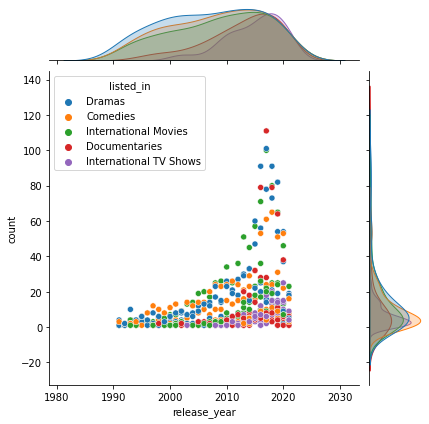

In [111]:
plt.figure(figsize=(15,15))
sns.jointplot(x= 'release_year', y = 'count', data= dw, hue='listed_in')
plt.show()

#### > International TV shows and Documentaries has sudden growth after 2000.
#### > dramas and comedies in all decades shows equal distribution

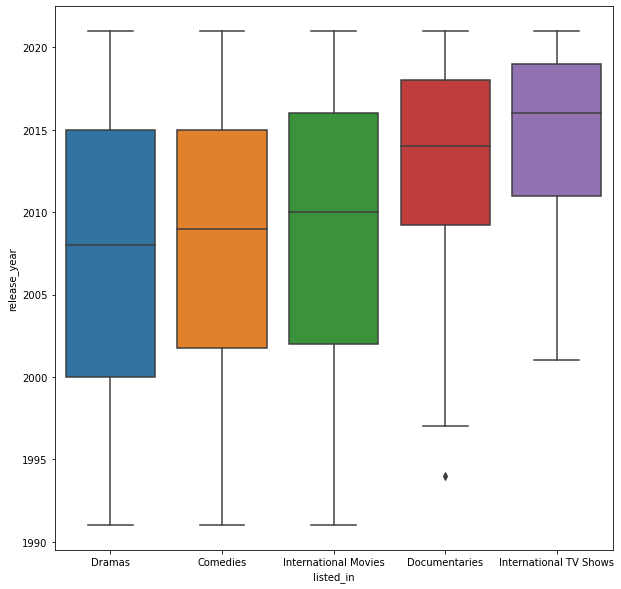

In [177]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'listed_in', y = 'release_year', data = dw)
plt.show()

#### Outlayer value: Documentarys are mainly relesed after 1997 .there are few documentary in 1994-95 so we can be ignore it

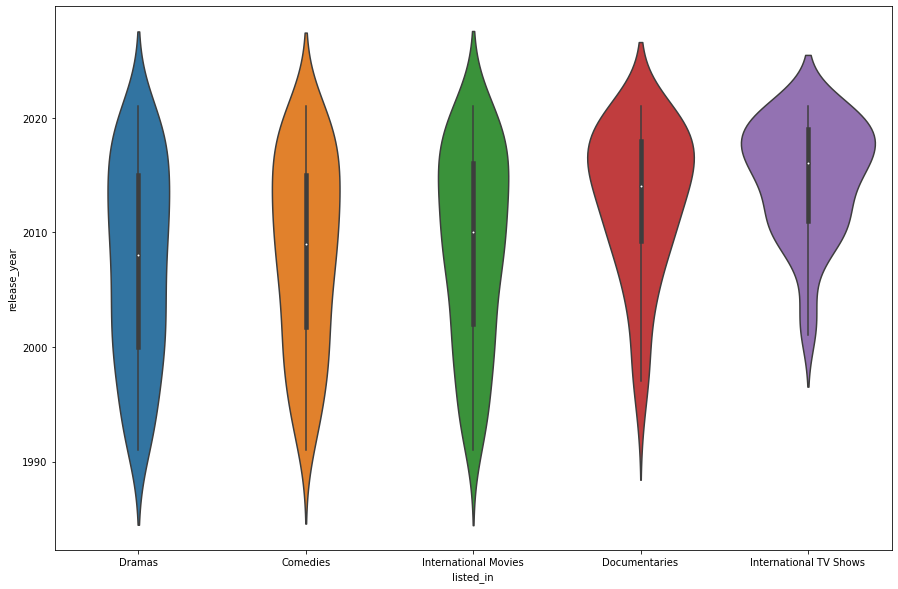

In [179]:
plt.figure(figsize=(15,10))
sns.violinplot(x = 'listed_in', y = 'release_year', data = dw)
plt.show()

#### From these Boxplot and violin plot we can see that :
    - International TV shows and Documentaries much distribute between 2010 to 2021
    - International movies dramas and comedies in all decades shows equal distribution 
    
    

## correlation between movie duration and No.of movies in last 3 decade

In [333]:
dx=dx[(dx['listed_in']=='International Movies')|(dx['listed_in']=='Dramas')|(dx['listed_in']=='Comedies')|
      (dx['listed_in']=='International TV Shows')|(dx['listed_in']=='Documentaries')]
k=m[m['release_year']>1990]
k=k[(k['listed_in']=='International Movies')|(k['listed_in']=='Dramas')|(k['listed_in']=='Comedies')|
    (k['listed_in']=='International TV Shows')|(k['listed_in']=='Documentaries')]
k

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,2021-01-01,2021,Young Adults(16+),54 min,Documentaries,They've built a movement out of minimalism. Lo...
4,s871,Movie,Amy Tan: Unintended Memoir,James Redford,Amy Tan,United States,2021-05-18,2021,Young Adults(16+),101 min,Documentaries,From her painful past to her successful career...
7,s889,Movie,The Upshaws - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster, ...",NaN,2021-05-14,2021,Young Adults(16+),32 min,Comedies,"The comedic dream team from ""The Upshaws"" disc..."
35,s855,Movie,Creating an Army of the Dead,NaN,NaN,NaN,2021-05-21,2021,Adults(18+),29 min,Documentaries,"Zack Snyder and his ""Army of the Dead"" team di..."
40,s1426,Movie,Creating The Queen's Gambit,NaN,NaN,United States,2021-01-08,2021,Young Adults(16+),14 min,Documentaries,A fascinating character. Exquisite sets. A wig...
...,...,...,...,...,...,...,...,...,...,...,...,...
5828,s6494,Movie,Class of '61,Gregory Hoblit,"Christien Anholt, Andre Braugher, Dan Futterma...",United States,2018-04-01,1993,Older Kids(7+)Parental Guidance Suggested,91 min,Dramas,"As the Civil War looms, a runaway slave seeks ..."
5842,s6268,Movie,Bebe's Kids,Bruce W. Smith,"Faizon Love, Vanessa Bell Calloway, Wayne Coll...",United States,2019-11-20,1992,Teens(13+),73 min,Comedies,"When ladies' man Robin meets Jamika, he falls ..."
5858,s1016,Movie,American Me,Edward James Olmos,"Edward James Olmos, William Forsythe, Pepe Ser...",United States,2021-04-17,1992,Adults only,126 min,Dramas,Three friends born in poverty create their own...
5861,s8434,Movie,The Naked Gun 2 1/2: The Smell of Fear,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",NaN,2020-01-01,1991,Teens(13+),85 min,Comedies,Bumbling cop Frank Drebin is out to foil the b...


In [334]:
k.loc[k['release_year']<=2000,'release_year']=19
k.loc[(k['release_year']>2000)&(k['release_year']<2010),'release_year']=20
k.loc[k['release_year']>=2010,'release_year']=21
k.rename(columns={'release_year':'relesed_decade'},inplace=True)
k

,show_id,type,title,director,cast,country,date_added,relesed_decade,rating,duration,listed_in,description
1,s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,2021-01-01,21,Young Adults(16+),54 min,Documentaries,They've built a movement out of minimalism. Lo...
4,s871,Movie,Amy Tan: Unintended Memoir,James Redford,Amy Tan,United States,2021-05-18,21,Young Adults(16+),101 min,Documentaries,From her painful past to her successful career...
7,s889,Movie,The Upshaws - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster, ...",NaN,2021-05-14,21,Young Adults(16+),32 min,Comedies,"The comedic dream team from ""The Upshaws"" disc..."
35,s855,Movie,Creating an Army of the Dead,NaN,NaN,NaN,2021-05-21,21,Adults(18+),29 min,Documentaries,"Zack Snyder and his ""Army of the Dead"" team di..."
40,s1426,Movie,Creating The Queen's Gambit,NaN,NaN,United States,2021-01-08,21,Young Adults(16+),14 min,Documentaries,A fascinating character. Exquisite sets. A wig...
...,...,...,...,...,...,...,...,...,...,...,...,...
5828,s6494,Movie,Class of '61,Gregory Hoblit,"Christien Anholt, Andre Braugher, Dan Futterma...",United States,2018-04-01,19,Older Kids(7+)Parental Guidance Suggested,91 min,Dramas,"As the Civil War looms, a runaway slave seeks ..."
5842,s6268,Movie,Bebe's Kids,Bruce W. Smith,"Faizon Love, Vanessa Bell Calloway, Wayne Coll...",United States,2019-11-20,19,Teens(13+),73 min,Comedies,"When ladies' man Robin meets Jamika, he falls ..."
5858,s1016,Movie,American Me,Edward James Olmos,"Edward James Olmos, William Forsythe, Pepe Ser...",United States,2021-04-17,19,Adults only,126 min,Dramas,Three friends born in poverty create their own...
5861,s8434,Movie,The Naked Gun 2 1/2: The Smell of Fear,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",NaN,2020-01-01,19,Teens(13+),85 min,Comedies,Bumbling cop Frank Drebin is out to foil the b...


In [339]:
dl=k.groupby(['relesed_decade','duration'])['title'].count().to_frame()
dl=dl.sort_values('duration',ascending=False).reset_index()
dl

,relesed_decade,duration,title
0,21,99 min,11
1,20,99 min,2
2,21,98 min,11
3,20,98 min,1
4,21,97 min,16
...,...,...,...
153,21,102 min,6
154,19,102 min,2
155,21,101 min,12
156,21,100 min,11


In [340]:
dl['duration'] = dl['duration'].map(lambda x: str(x)[:-3])
dl['duration'] = dl['duration'].astype(int)
dl

,relesed_decade,duration,title
0,21,99,11
1,20,99,2
2,21,98,11
3,20,98,1
4,21,97,16
...,...,...,...
153,21,102,6
154,19,102,2
155,21,101,12
156,21,100,11


In [347]:
d21=dl[dl['relesed_decade']==21]
d20=dl[dl['relesed_decade']==20]
d19=dl[dl['relesed_decade']==19]

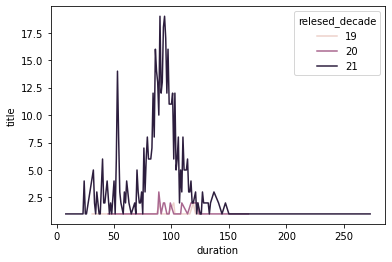

In [345]:
sns.lineplot(x= 'duration', y= 'title', data = dl,hue='relesed_decade')
plt.show()

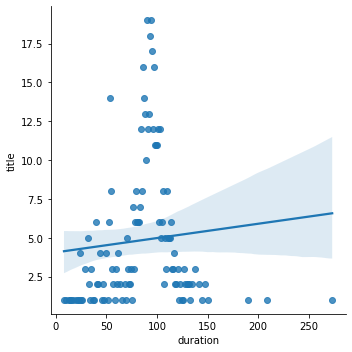

In [351]:
sns.lmplot(x = 'duration', y= 'title', data = d21)
plt.show()

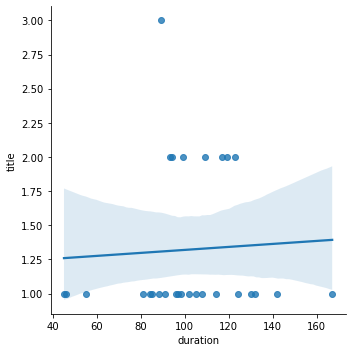

In [348]:
sns.lmplot(x = 'duration', y= 'title', data = d20)
plt.show()

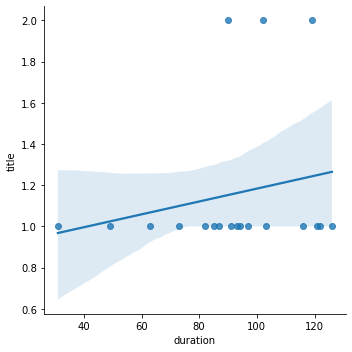

In [349]:
sns.lmplot(x = 'duration', y= 'title', data = d19)
plt.show()

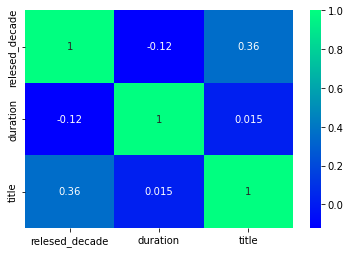

In [355]:
sns.heatmap(dl.corr(), cmap= "winter", annot=True)
plt.show()

#### insights:
    1.In last 3 dacade no of movies increses                              [corr(relesed_decade vs title)=0.36]
    2.there is small decrese in movie duration in last 3 dacades          [corr(relesed_decade vs duration)=-0.12]
    3.for almost all movie duration No.of movie relesed is same           [corr(title vs duration)=0.015]

# Conclusion

# Insights and Recommendation

- Almost 70% of the Shows in Netflix are Movies. Most views prefer Movies in worldwide
- United states and United Kingdom are the most movie releasing country in Netflix,English language audiance are more in   worldwide. So,more English movies can host in Netflix
- There is a sudden growth in Shows relesed on netflix in past 3 decades
- Ken Burns and Alastair Fothergill are the most  TV-show releasing directors, Netflix can mostly recommend their TV-shows
- most directors didnot do both tv shows and movies. few directers like 'Marcus Raboy','Anurag Kashyap','Ryan Polito' are         producing both movie and TV-Shows.So their TV-show fans can recommend their movies too.
- United states has most of the directors ,second most is India.verirty of content is available in these countrys
- Diffrent kind of genres available in Netflix.International Movies are most in Netflix, Dramas and comedies are second and   third most genres in Netflix .Kids shows are much less compire to other shows
- Netflix contain most of the movies in the duration of 50 min to 150 min range. Audiance moslty prefer short movies and maximum 150 min .lenghty movies didnot prefer audiance. So,mostly Recommend in these duration range movie to coustemers
- For 19th century there is only 2 type of rating are in netflix. In last 3 decades shows produced based on diffrent type of rating, It can help us to watch diffrent verity of shows. In recent years adults shows are the most relesed. Kids movies and shows are low compare to adults shows
- Relese movie in Netflix in this order
    - International movies,Documentaries,Sci-Fi & Fantasy,Horrer movies  and Dramas mostly relesed on starting and                     middle of the year 
    - International TV-Shows,Action adventure Romantic movies,classic movies and TV-Comedies are relesed on year endings ,           - TV-action and adventure, Thrillers, Comedies are mostly relesed on halferly
- For worldwide July is the most movie produced month .movie relesed in almost all months are equal.July is the best month for    movie relese
- december, is most festive season in india, so most movies relese on december. March,April,October,November,December are the other most movie relesing months, for these months directrs can release movies for high number of views
- 38% of the movies relesed on first week of the month. 
- Most of Netflix contain Adults shows. only 15% of show is for kids, so we should more focus on kids movies and TV-Shows
-  In correlation-Heatmap and lmplot we can see that number of TV-Shows decrese with season increses (correlation=-0.69). 17 is most number of seasons in TV-Shows.So it better to take TV-Shows maximum of 8 season.There are few shows have more than 8 seasons
- Jan suter is the most productive director. he directed average of 10.5 movie per year.Only 186 directors are producing average of above 1 show per year. we can recommend directors who have an avrage more than 1 in each countrys.
- Engish language movie in USA and UK can be recommend for every countrys
- Martin scorsese is the most active director Netflix, he is in the field of 52 long years.More active directors in each country movies can be mostly recommented
- In India and worldwide Anupam Kher is the most movie acter. he act in 43 shows, Shah Rukh Khan is second most acter in netflix we can mostly recommed their movie to indian as well as other countrys
- In india Anupam Kher,Julie Tejwani,Naseeruddin Shah and Shah Rukh Khan are the top acters. In usa Andrea Libman Samuel L. Jackson and Tara Strong are the top acters.In Japan Yuki Kaji and in Hong Kong Vincent Tong are the acters. So, these acters movie in each country can be more recommented
- International TV shows and Documentaries has sudden growth after 2000. dramas and comedies in all decades shows equal  distribution.Also From these Boxplot and violin plot we can see that
   - International TV shows and Documentaries much distribute between 2010 to 2021
   - International movies dramas and comedies in all decades shows equal distribution,
So these high demanding genres are mostly recommented
- In last 3 dacade no of movies increses                              [corr(relesed_decade vs title)=0.36],
- there is small decrese in movie duration in last 3 dacades          [corr(relesed_decade vs duration)=-0.12]
- for almost all movie duration No.of movie relesed is same           [corr(title vs duration)=0.015]
 So, movies and short movies duration dont want to change.length should be maintain from 50 min to 150 min